# Improving Accuracy through Increasing Training Data Size and Exploring Rate of Learning

The dataset used to train the logistic regression model shown in [this notebook](https://colab.research.google.com/drive/17LTkRgS5FaLsl2vKLiTB7R93MbQMLUuu?usp=sharing) is a preloaded IMDB dataset containing movie reviews and their label (positive/negative sentiment). This dataset contains 25,000 rows of training data and 25,000 rows of test data.

The model achieved an accuracy of 77% by using an 80/20 split of just the training data. The same model achieved 74% when tested on 1,000 sentences from the test data. 

This means that the model is being trained only on 20,000 sentences and tested on 6,000 sentences.

Having the total of 50,000 sentences available in the IMDB dataset, training the model on 20,000 sentences and testing on 10,000 would suggest a 66/33 split on 70% of the available data. Increasing this split and using all available data should have a positive impact on the accuracy of the model.

<b><u>Part 1:</u> Using 50,000 Rows Between Training and Testing</b>

The first part of this notebook explores the effect of increasing the size of our training set by using all possible data entries available. This is tested at several splits, as follows:
* 50/50
* 60/40
* 70/30
* 80/20
* 90/10
* 95/5

These results are then compared and visualised.

<b><u>Part 2:</u> Plot the Rate of Learning when using only the Designated Training Data to Train</b>
    
As this dataset is used industry-wide to model various NLP tasks, it is expected that the designated training set is only used for training. In the second part of the notebook, the learning rate of the classification model is explored. There is a fixed test dataset (of size 1,000), and it is tested on an increasing (compounded) training dataset. 

## Importing Relevant Packages and IMDB Dataset

In [1]:
import sklearn
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
raw_datasets = load_dataset("imdb")

Reusing dataset imdb (C:\Users\laram\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

# Part 1: 

## Part 1.1 : Using All data and Setting the Test/Train split to 50/50

### Assigning the Training Data

In [7]:
train_dataset = raw_datasets['train']
train_data = []
train_data_labels = []
for item in train_dataset:
    train_data.append(item['text'])
    train_data_labels.append(item['label'])

In [8]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [13]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [14]:
test_dataset = raw_datasets['test']
test_data = []
test_data_labels = []
for item in test_dataset:
    test_data.append(item['text'])
    test_data_labels.append(item['label'])

In [15]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [16]:
print(accuracy_score(test_pred,test_data_labels))

0.76448


## Part 1.2 : Increasing the Test/Train split to 60/40

### Assigning all Data to List

In [53]:
all_data = []
all_data_labels = []
for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

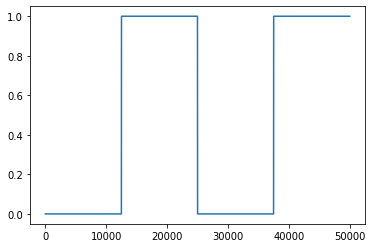

In [54]:
plt.plot(all_data_labels)
plt.show()

The distibution of positive and negative sentiment is not split randomly, we will have to randomise the assignment of training vs. test data.

In [55]:
training_ids = random.sample(list(np.arange(0,50000)), 30000)
testing_ids = [review_id for review_id in list(np.arange(0,50000)) if review_id not in training_ids]

### Assigning Training and Testing Data

In [56]:
train_data = []
train_data_labels = []
test_data = []
test_data_labels = []

for review_id in training_ids:
    train_data.append(all_data[review_id])
    train_data_labels.append(all_data_labels[review_id])
for review_id in testing_ids:
    test_data.append(all_data[review_id])
    test_data_labels.append(all_data_labels[review_id])

We need to ensure that the reviews are evenly distributed between the training set and the test set to ensure there is no bias that can affect the accuracy.

In [57]:
positive_training = sum(train_data_labels) /len(training_ids) * 100
positive_testing = sum(test_data_labels) / len(testing_ids) * 100
    
print("The percentage of positive reviews in the training set is " + str(positive_training) + "%")
print("The percentage of positive reviews in the testing set is " + str(positive_testing) + "%")

The percentage of positive reviews in the training set is 49.81333333333333%
The percentage of positive reviews in the testing set is 50.28%


The percentages are close enough to 50% to allow the distribution to be considered fair.

In [58]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [59]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [60]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [61]:
print(accuracy_score(test_pred,test_data_labels))

0.77395


The highest accuracy achieved by this model as of yet is 76.66% (achieved by using an 80/20 split on the test data).

Using a 60/40 split on all of the available data has slightly improved this score, increasing by 0.735% to 77.395%.

If we increase this to a 70/30 split, it may be possible to increase this accuracy again.

## Part 1.3 : Increasing the Test/Train split to 70/30

### Assigning all Data to List

In [62]:
all_data = []
all_data_labels = []
for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

In [63]:
training_ids = random.sample(list(np.arange(0,50000)), 35000)

### Assigning Training and Testing Data

In [66]:
train_data = []
train_data_labels = []
test_data = []
test_data_labels = []

for review_id in range(0,50000):
    if review_id in training_ids:
        train_data.append(all_data[review_id])
        train_data_labels.append(all_data_labels[review_id])
    else:
        test_data.append(all_data[review_id])
        test_data_labels.append(all_data_labels[review_id])

We need to ensure that the reviews are evenly distributed between the training set and the test set to ensure there is no bias that can affect the accuracy.

In [72]:
positive_training = sum(train_data_labels) / len(train_data_labels) * 100
positive_testing = sum(test_data_labels) / len(test_data_labels) * 100
    
print("The percentage of positive reviews in the training set is " + str(positive_training) + "%")
print("The percentage of positive reviews in the testing set is " + str(positive_testing) + "%")

The percentage of positive reviews in the training set is 49.74285714285715%
The percentage of positive reviews in the testing set is 50.6%


The percentages are close enough to 50% to allow the distribution to be considered fair.

In [73]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [74]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [75]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [76]:
print(accuracy_score(test_pred,test_data_labels))

0.7667333333333334


An accuracy of 76.67% is a slight reduction from the 60/40 split.

Let's try increasing the split to 80/20.

## Part 1.4  : Increasing the Test/Train split to 80/20

### Assigning all Data to List

In [77]:
all_data = []
all_data_labels = []
for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

In [78]:
training_ids = random.sample(list(np.arange(0,50000)), 40000)

### Assigning Training and Testing Data

In [79]:
train_data = []
train_data_labels = []
test_data = []
test_data_labels = []

for review_id in range(0,50000):
    if review_id in training_ids:
        train_data.append(all_data[review_id])
        train_data_labels.append(all_data_labels[review_id])
    else:
        test_data.append(all_data[review_id])
        test_data_labels.append(all_data_labels[review_id])

We need to ensure that the reviews are evenly distributed between the training set and the test set to ensure there is no bias that can affect the accuracy.

In [80]:
positive_training = sum(train_data_labels) / len(train_data_labels) * 100
positive_testing = sum(test_data_labels) / len(test_data_labels) * 100
    
print("The percentage of positive reviews in the training set is " + str(positive_training) + "%")
print("The percentage of positive reviews in the testing set is " + str(positive_testing) + "%")

The percentage of positive reviews in the training set is 50.11750000000001%
The percentage of positive reviews in the testing set is 49.53%


The percentages are close enough to 50% to allow the distribution to be considered fair.

In [81]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [82]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [83]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [84]:
print(accuracy_score(test_pred,test_data_labels))

0.7677


An accuracy of 76.77% is still not a noticeable improvement from the 70/30 split, but slightly smaller than the 60/40 increase.

## Part 1.5 : Increasing the Test/Train split to 90/10

### Assigning all Data to List

In [97]:
all_data = []
all_data_labels = []
for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

In [98]:
training_ids = random.sample(list(np.arange(0,50000)), 45000)

### Assigning Training and Testing Data

In [99]:
train_data = []
train_data_labels = []
test_data = []
test_data_labels = []

for review_id in range(0,50000):
    if review_id in training_ids:
        train_data.append(all_data[review_id])
        train_data_labels.append(all_data_labels[review_id])
    else:
        test_data.append(all_data[review_id])
        test_data_labels.append(all_data_labels[review_id])

We need to ensure that the reviews are evenly distributed between the training set and the test set to ensure there is no bias that can affect the accuracy.

In [100]:
positive_training = sum(train_data_labels) / len(train_data_labels) * 100
positive_testing = sum(test_data_labels) / len(test_data_labels) * 100
    
print("The percentage of positive reviews in the training set is " + str(positive_training) + "%")
print("The percentage of positive reviews in the testing set is " + str(positive_testing) + "%")

The percentage of positive reviews in the training set is 49.95333333333333%
The percentage of positive reviews in the testing set is 50.42%


The percentages are close enough to 50% to allow the distribution to be considered fair.

In [101]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [102]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [103]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [104]:
print(accuracy_score(test_pred,test_data_labels))

0.7766


77.66% is the highest accuracy achieved yet, although not by much.

Let's test 95/5 split.

## Part 1.6 : Increasing the Test/Train split to 95/5

### Assigning all Data to List

In [108]:
all_data = []
all_data_labels = []
for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

for item in raw_datasets['train']:
    all_data.append(item['text'])
    all_data_labels.append(item['label'])

In [109]:
training_ids = random.sample(list(np.arange(0,50000)), 47500)

### Assigning Training and Testing Data

In [110]:
train_data = []
train_data_labels = []
test_data = []
test_data_labels = []

for review_id in range(0,50000):
    if review_id in training_ids:
        train_data.append(all_data[review_id])
        train_data_labels.append(all_data_labels[review_id])
    else:
        test_data.append(all_data[review_id])
        test_data_labels.append(all_data_labels[review_id])

We need to ensure that the reviews are evenly distributed between the training set and the test set to ensure there is no bias that can affect the accuracy.

In [111]:
positive_training = sum(train_data_labels) / len(train_data_labels) * 100
positive_testing = sum(test_data_labels) / len(test_data_labels) * 100
    
print("The percentage of positive reviews in the training set is " + str(positive_training) + "%")
print("The percentage of positive reviews in the testing set is " + str(positive_testing) + "%")

The percentage of positive reviews in the training set is 50.01052631578947%
The percentage of positive reviews in the testing set is 49.8%


The percentages are close enough to 50% to allow the distribution to be considered fair.

In [112]:
vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()

### Training the Model

In [113]:
log_model = LogisticRegression()
log_model = log_model.fit(X=features_nd,y=train_data_labels)

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assigning the Test Data and Testing the Model

In [114]:
test_pred=log_model.predict(vectorizer.transform(test_data).toarray())

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [115]:
print(accuracy_score(test_pred,test_data_labels))

0.7724


An accuracy of 77.24% is very close to the highest accuracy of 77.66%. 

## Part 1.7 : Results

In [116]:
results = {'iteration' : [1.1, 1.2, 2, 3, 4, 5, 6, 7],
               'number_rows' : [25000, 21000, 50000, 50000, 50000, 50000, 50000, 50000],
               'percentage_training' : [80, 95, 50, 60, 70, 80, 90, 95],
               'percentage_testing' : [20, 5, 50, 40, 30, 20, 10, 5],
               'accuracy' : [76.66, 74, 76.45, 77.4, 76.67, 76.77, 77.66, 77.24]}

In [118]:
results_pd = pd.DataFrame(results)
results_pd

,iteration,number_rows,percentage_training,percentage_testing,accuracy
0,1.1,25000,80,20,76.66
1,1.2,21000,95,5,74.00
2,2.0,50000,50,50,76.45
3,3.0,50000,60,40,77.40
4,4.0,50000,70,30,76.67
5,5.0,50000,80,20,76.77
6,6.0,50000,90,10,77.66
7,7.0,50000,95,5,77.24


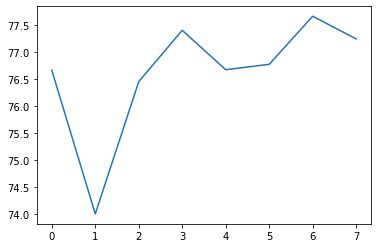

In [122]:
plt.plot(results_pd.index, results_pd['accuracy']);

# Part 2 : Identifying the Learning Rate

## Assigning Universal Train and Test Set

In [3]:
test_dataset = raw_datasets['test'].shuffle(seed=42).select(range(1000)) # randomly selecting 1000 / 25000
test_data = []
test_data_labels = []
for item in test_dataset:
    test_data.append(item['text'])
    test_data_labels.append(item['label'])

Loading cached shuffled indices for dataset at C:\Users\laram\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1\cache-b23cfeb68a931a8d.arrow


In [4]:
train_dataset = raw_datasets['train']
train_data = []
train_data_labels = []
for item in train_dataset:
    train_data.append(item['text'])
    train_data_labels.append(item['label'])

In [5]:
accuracy_data = {'iteration' : [],
                'accuracy': []}

In [6]:
remaining_review_ids = np.arange(0,25000)
sample_train_data = []
sample_train_data_labels = []

iteration = 1

while len(remaining_review_ids):
    
    # Updating Training Dataset
    sample_training_ids = random.sample(list(remaining_review_ids), 1000)
    for review_id in sample_training_ids:
        sample_train_data.append(train_data[review_id])
        sample_train_data_labels.append(train_data_labels[review_id])
    
    # Adjust Remaining Review IDs
    remaining_review_ids = [review_id for review_id in remaining_review_ids if review_id not in sample_training_ids]
    
    # Creating Vector Representations
    vectorizer = CountVectorizer(analyzer='word',max_features=200,lowercase=True)
    features = vectorizer.fit_transform(sample_train_data)
    features_nd = features.toarray()

    # Training the Logistic Regression Model
    log_model = LogisticRegression()
    log_model = log_model.fit(X=features_nd,y=sample_train_data_labels)

    # Outputting the Prediction
    test_pred=log_model.predict(vectorizer.transform(test_data).toarray())
    accuracy_data['iteration'].append(iteration)
    accuracy_data['accuracy'].append(accuracy_score(test_data_labels,test_pred))
    iteration += 1

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver wi

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver wi

C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\laram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver wi

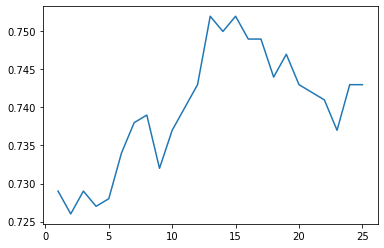

In [7]:
plt.plot(accuracy_data['iteration'], accuracy_data['accuracy']);

When testing on a fixed 1,000 reviews, it seems that there is an optimal accuracy at a training data size of 13,000-15,000. 

There seems to be a steady loss in accuracy if we venture smaller or greater than 13-15 thousand reviews. Theoretically, having more training data should increase the accuracy, the decrease shown in the plot above could be as a result of the small test set. The larger models may perform poorly on this specific test set, but may be more robust when tested on larger/more varied testing data.